In [ ]:
!pip install emoji==1.7.0
!pip install emojis matplotlib wordcloud

In [ ]:
import pandas as pd
# packs for emoji
import emoji

# packs for emoji cloud
import emojis
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Project - NLP')

In [ ]:
TSLA = pd.read_csv('TSLA_pre_processed.csv')
TSLA.head()

body_prepared  \
0                                            $TSLA 🤙   
1  $TSLA it so painful holding puts over Xmas but...   
2  $SHAK sorry Morgan Stanley your price targets ...   
3  $TSLA oh boy! Going to ROCKET Thursday! 450 by...   
4                  $SPY $TSLA   Why is Tesla at 425?   

                                   body_preprocessed  count_all_char  \
0                         cashtag_TSLA call_me_hand                6   
1  cashtag_TSLA it so painful holding puts over X...              69   
2  cashtag_SHAK sorry Morgan Stanley your price t...             135   
3  cashtag_TSLA oh boy! Going to ROCKET Thursday!...              68   
4    cashtag_SPY cashtag_TSLA   Why is Tesla at 425?              25   

   count_alpha  count_cashtag  count_digit  count_emoji  count_hashtag  \
0            4              1            0            1              0   
1           66              1            0            2              0   
2          126              2            2            0              0   
3           57              1            6            0              0   
4           19              2            3            0              0   

   count_mention  count_sent  count_token                 created_at  \
0              0           1            2  2019-12-24 20:45:19+00:00   
1              0           1           17  2019-12-24 20:45:49+00:00   
2              0           4           26  2019-12-24 20:46:39+00:00   
3              0           4           15  2019-12-24 20:49:34+00:00   
4              0           1            7  2019-12-24 20:52:52+00:00   

       created_at_us_eastern sentiment stock  
0  2019-12-24 15:45:19-05:00   Bullish  TSLA  
1  2019-12-24 15:45:49-05:00   Bearish  TSLA  
2  2019-12-24 15:46:39-05:00   Bullish  TSLA  
3  2019-12-24 15:49:34-05:00   Bullish  TSLA  
4  2019-12-24 15:52:52-05:00       NaN  TSLA

In [ ]:
def Sep_Bull_Bear(file):
  entity = pd.read_csv(file)
  entity_Bull = entity[entity['sentiment'] == 'Bullish']
  entity_Bear = entity[entity['sentiment'] == 'Bearish']
  entity_Bull_comb = ' '.join(entity_Bull ['body_prepared'])
  entity_Bear_comb = ' '.join(entity_Bear ['body_prepared'])
  return entity_Bull_comb, entity_Bear_comb

In [ ]:
TSLA_Bull_comb, TSLA_Bear_comb = Sep_Bull_Bear('TSLA_pre_processed.csv')
AAPL_Bull_comb, AAPL_Bear_comb = Sep_Bull_Bear('AAPL_pre_processed.csv')
AMZN_Bull_comb, AMZN_Bear_comb = Sep_Bull_Bear('AMZN_pre_processed.csv')
NVDA_Bull_comb, NVDA_Bear_comb = Sep_Bull_Bear('NVDA_pre_processed.csv')
FB_Bull_comb, FB_Bear_comb = Sep_Bull_Bear('FB_pre_processed.csv')

In [ ]:
Bull_comb = ' '.join([TSLA_Bull_comb, AAPL_Bull_comb, AMZN_Bull_comb, NVDA_Bull_comb, FB_Bull_comb])
Bear_comb = ' '.join([TSLA_Bear_comb, AAPL_Bear_comb, AMZN_Bear_comb, NVDA_Bear_comb, FB_Bear_comb])

In [ ]:
class EmojiCloud:
    def __init__(self, font_path='Symbola.otf'):
        self.font_path = font_path
        self.word_cloud = self.initialize_wordcloud()
        self.emoji_probability = None

        
    def initialize_wordcloud(self):
        return WordCloud(font_path=self.font_path,
                               width=2000,
                               height=1000,
                               background_color='white',
                               random_state=42,
                               collocations=False)

    
    def color_func(self, word, font_size, position, orientation, random_state=None,
                   **kwargs):
        hue_saturation = '42, 88%'

        current_emoji_probability = self.emoji_probability[word]
        if current_emoji_probability >= 0.10:
            opacity = 50
        else:
            opacity = 75 - current_emoji_probability/0.2 * 5
        return f"hsl({hue_saturation},{opacity}%)"

    def generate(self, text):
        emoji_frequencies = Counter(emojis.iter(text))
        total_count = sum(emoji_frequencies.values())
        
        self.emoji_probability = {emoji: count/total_count for emoji, count in emoji_frequencies.items()}
        wc = self.word_cloud.generate_from_frequencies(emoji_frequencies)
        
        plt.figure(figsize=(20,10))
        plt.imshow(wc.recolor(color_func=self.color_func, random_state=42))
        plt.axis("off")

### Emoji Cloud by Company

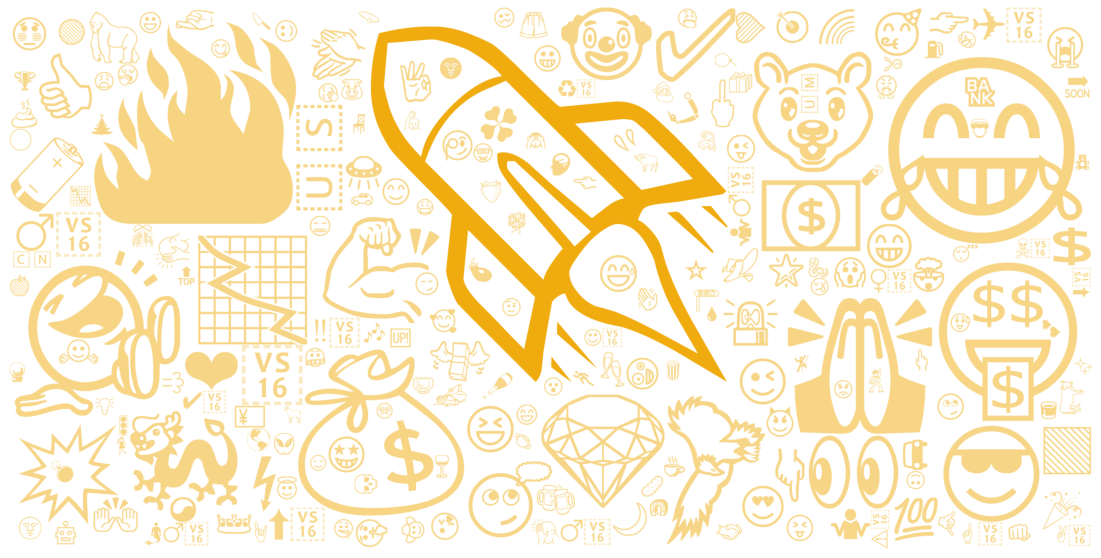

In [ ]:
emoji_cloud = EmojiCloud(font_path='./Symbola.otf')
emoji_cloud.generate(TSLA_Bull_comb)

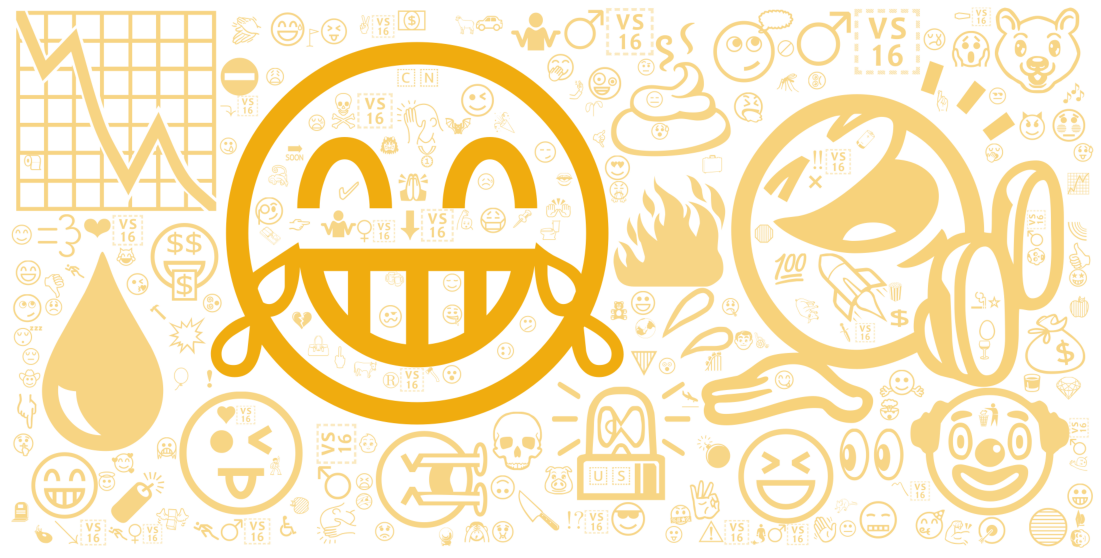

In [ ]:
emoji_cloud.generate(TSLA_Bear_comb)

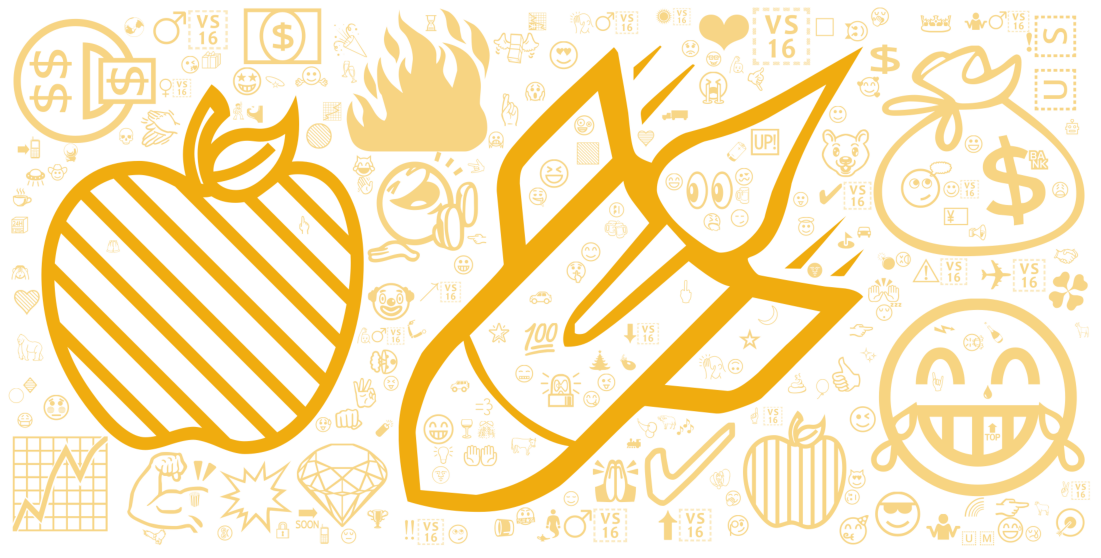

In [ ]:
emoji_cloud.generate(AAPL_Bull_comb)

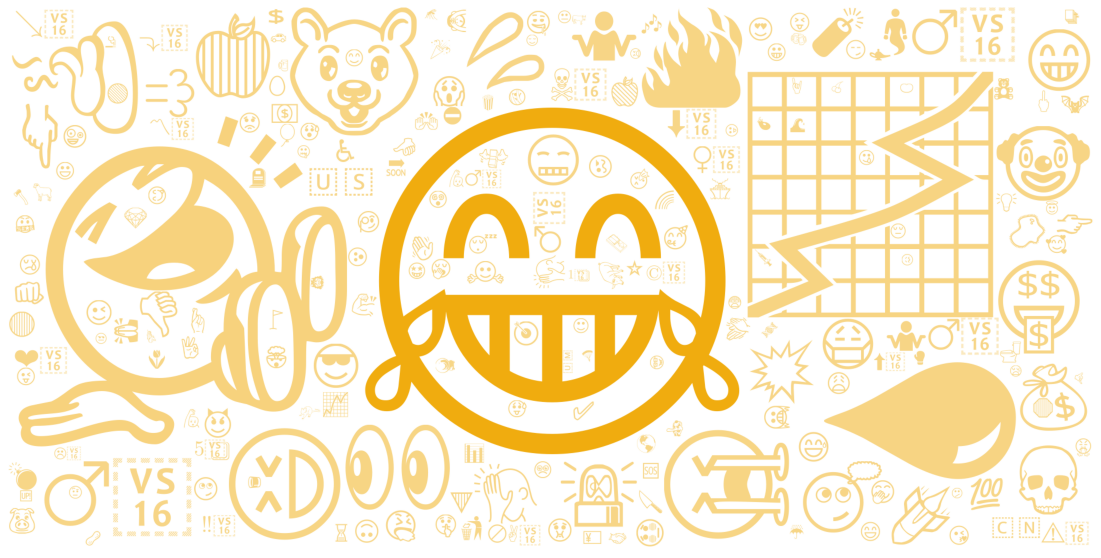

In [ ]:
emoji_cloud.generate(AAPL_Bear_comb)

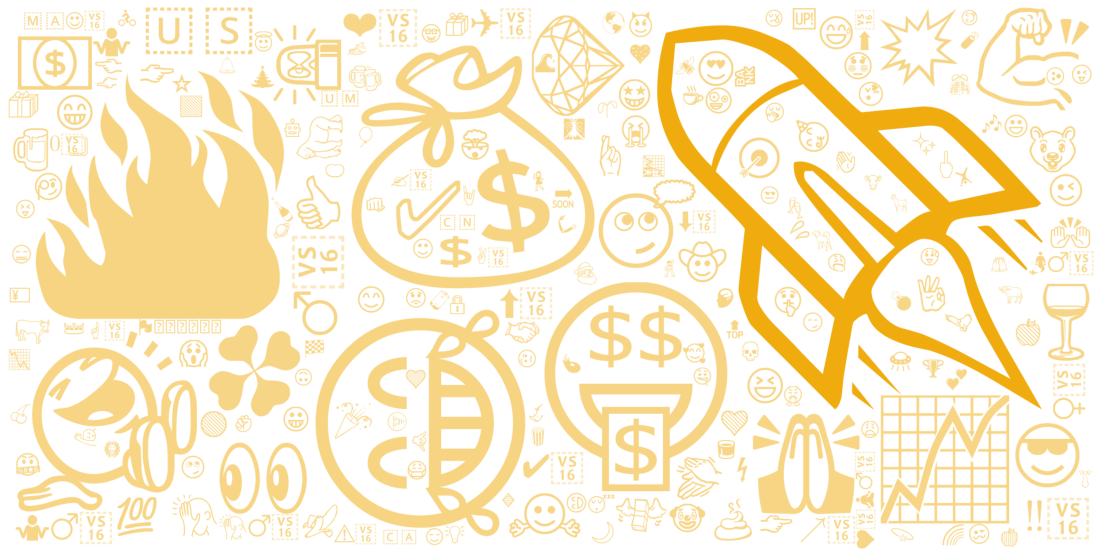

In [ ]:
emoji_cloud.generate(AMZN_Bull_comb)

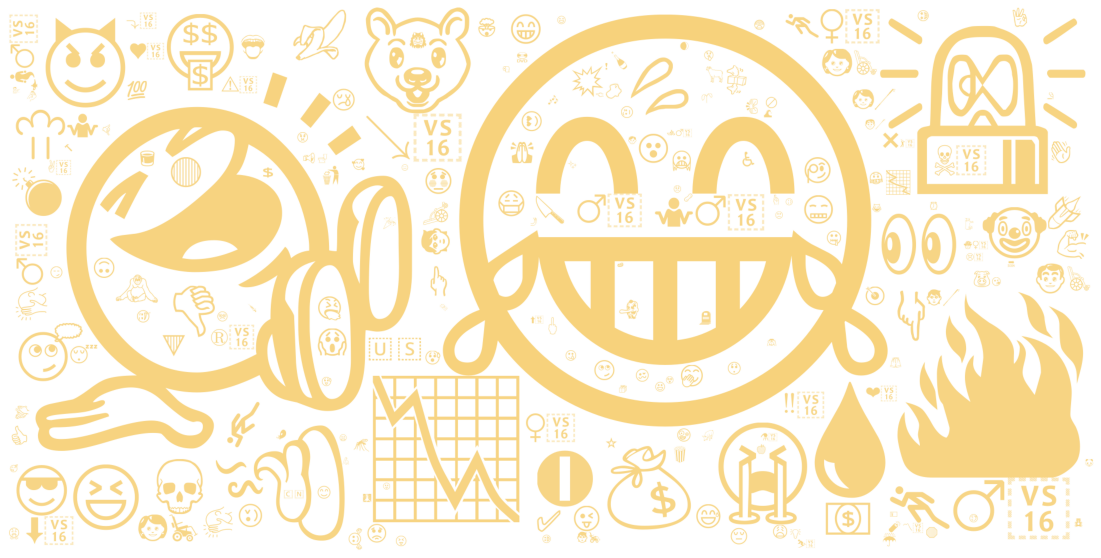

In [ ]:
emoji_cloud.generate(AMZN_Bear_comb)

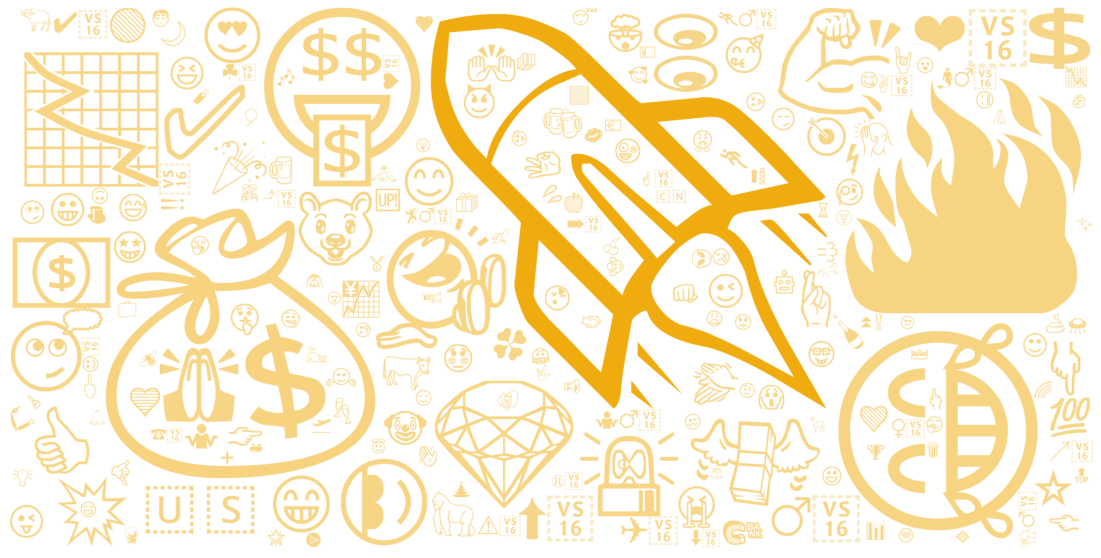

In [ ]:
emoji_cloud.generate(NVDA_Bull_comb)

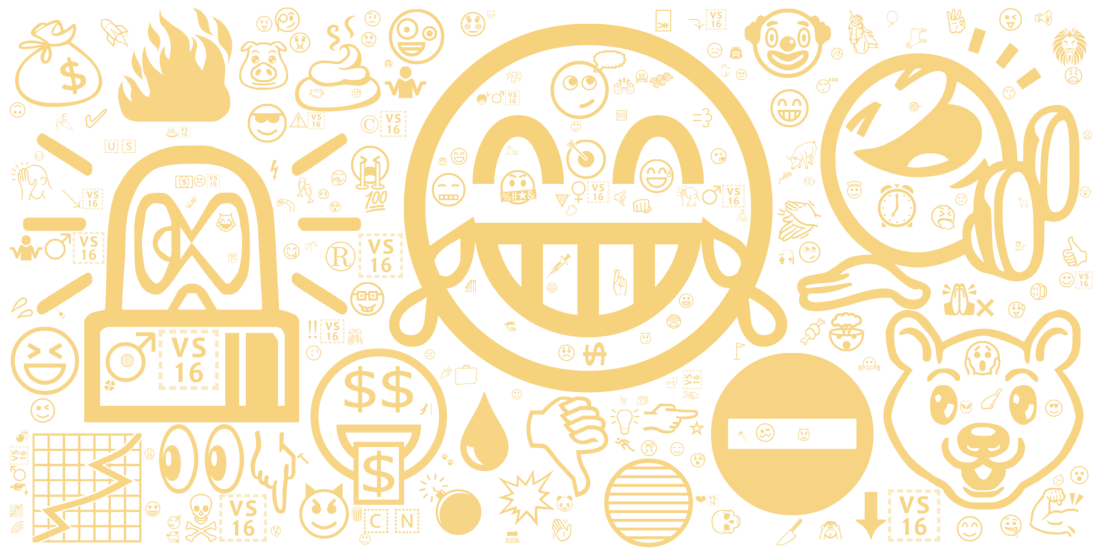

In [ ]:
emoji_cloud.generate(NVDA_Bear_comb)

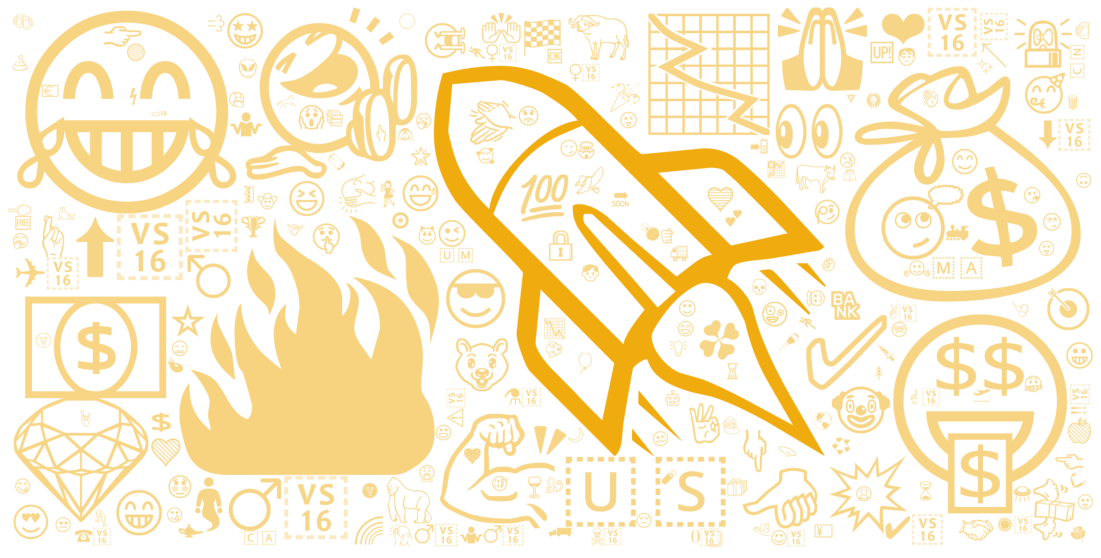

In [ ]:
emoji_cloud.generate(FB_Bull_comb)

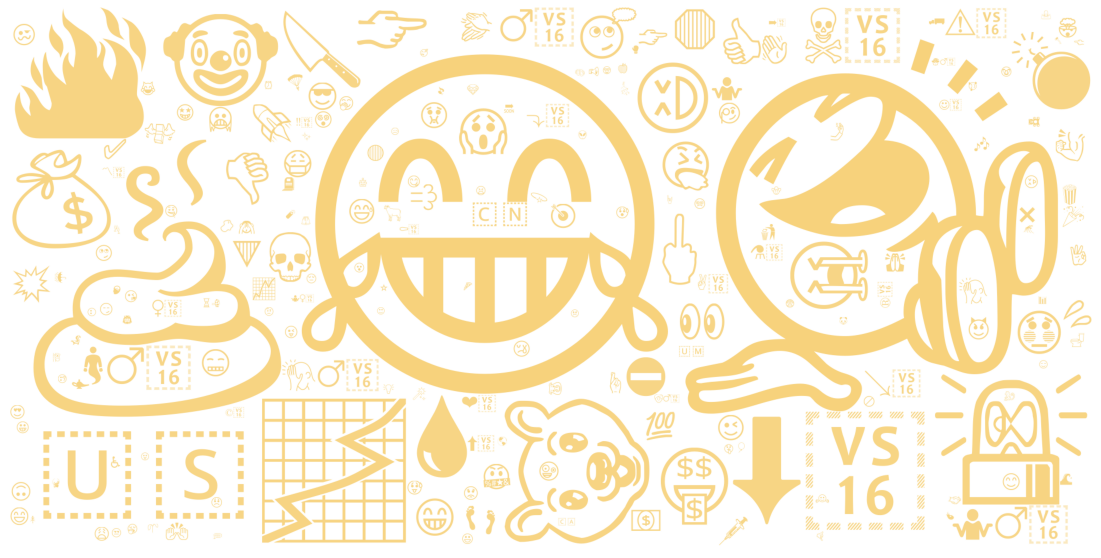

In [ ]:
emoji_cloud.generate(FB_Bear_comb)

In [ ]:
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [ ]:
TSLA[TSLA['sentiment'] == 'Bearish']['body_prepared'][0:100]

1                                                                                                                                                                                                                                                                                                                                                                                                                                                                   $TSLA it so painful holding puts over Xmas but hold tight bears our time will come 😭😂
45                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### Combine Emoji

In [ ]:
emoji_cloud = EmojiCloud(font_path='./Symbola.otf')

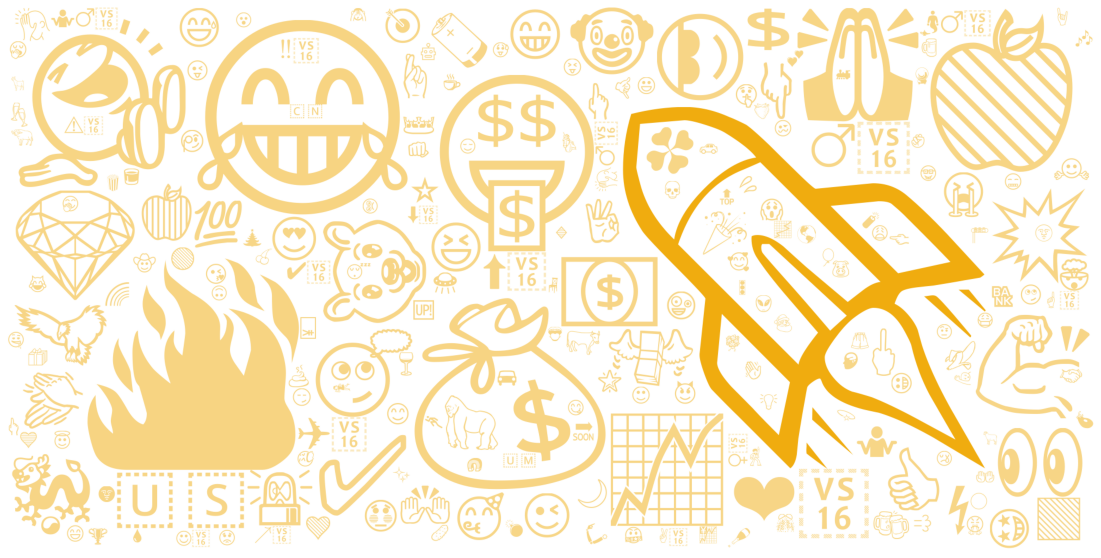

In [ ]:
emoji_cloud.generate(Bull_comb)

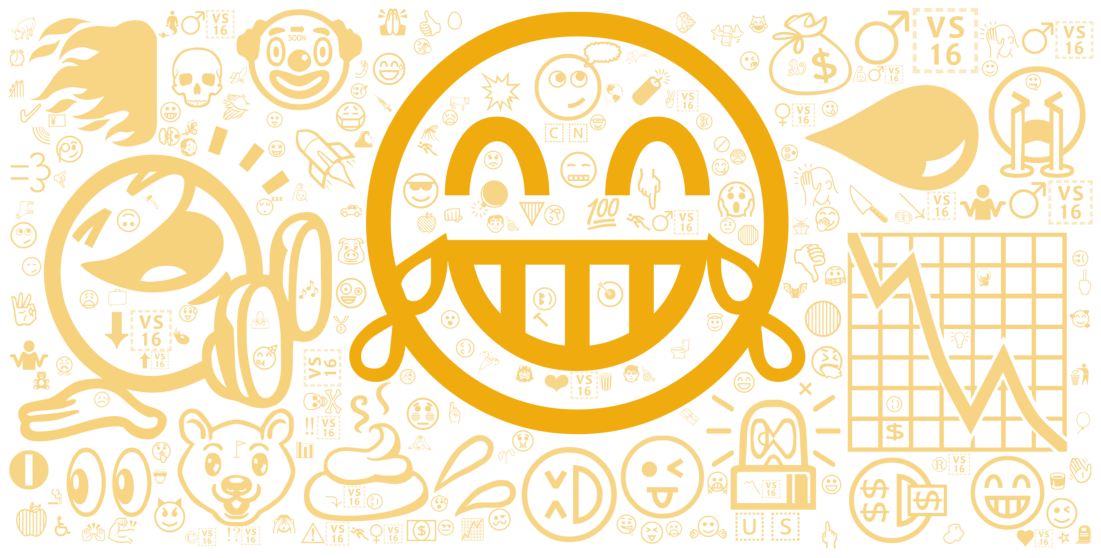

In [ ]:
emoji_cloud.generate(Bear_comb)

In [ ]:
class EmojiDist:
    def __init__(self, font_path='Symbola.otf'):
        self.font_path = font_path
        self.word_cloud = self.initialize_wordcloud()
        self.emoji_probability = None

        
    def initialize_wordcloud(self):
        return WordCloud(font_path=self.font_path,
                               width=2000,
                               height=1000,
                               background_color='white',
                               random_state=42,
                               collocations=False)

    
    def color_func(self, word, font_size, position, orientation, random_state=None,
                   **kwargs):
        hue_saturation = '42, 88%'

        current_emoji_probability = self.emoji_probability[word]
        if current_emoji_probability >= 0.10:
            opacity = 50
        else:
            opacity = 75 - current_emoji_probability/0.2 * 5
        return f"hsl({hue_saturation},{opacity}%)"

    def generate(self, text):
        emoji_frequencies = Counter(emojis.iter(text))
        total_count = sum(emoji_frequencies.values())
        
        self.emoji_probability = {emoji: count/total_count for emoji, count in emoji_frequencies.items()}
        dict(sorted(self.emoji_probability.items(), key=lambda item: item[1]),reverse = True)

In [ ]:
emoji_dist = EmojiDist(font_path='./Symbola.otf')

In [ ]:
emoji_dist.generate(Bull_comb)